# Stroke Data


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

#Libraries additionally added
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


# Study data files
stroke_data_path = "../Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv"

# Read the Stroke data 
stroke_data = pd.read_csv(stroke_data_path)

#Display the DataFrame
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#Check the unique count for the Pateint ID 
unique_patient_count = stroke_data['id'].nunique()
unique_patient_count

5110

In [3]:
#Checking the data types for each column.

stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
# Find duplicate IDs
duplicate_ids = stroke_data[stroke_data['id'].duplicated(keep=False)]

# Display the duplicate IDs
print(duplicate_ids)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [5]:
#Check out the data set for null values
null_values = stroke_data.isna().sum()
null_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Remove rows with NaN values in the bmi column
columns_to_check = ['bmi']

#Drop the previous index and reset the index
stroke_data_cleaned = stroke_data.dropna(subset=columns_to_check).reset_index(drop=True)

#Display the DataFrame
stroke_data_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
#Checking for the 'other' gender and dropping it from the dataset

stroke_data_cleaned = stroke_data_cleaned[stroke_data_cleaned['gender'] != 'Other']
stroke_data_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
#Remove the decimal values in age
stroke_data_cleaned = stroke_data_cleaned.copy()

stroke_data_cleaned.loc[:, 'age'] = stroke_data_cleaned['age'].apply(lambda x: int(x))

stroke_data_cleaned.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_17520\3136315506.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stroke_data_cleaned.loc[:, 'age'] = stroke_data_cleaned['age'].apply(lambda x: int(x))


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
# Checking the number of patient id in the clean DataFrame.
unique_patient_count_Cleaned = stroke_data_cleaned['id'].nunique()
unique_patient_count_Cleaned

4908

## Summary Statistics for Stroke 

In [10]:
#Find the mean, median, variance, standard deviation for the Glucose Level

glucose_level_stats = stroke_data_cleaned["avg_glucose_level"].describe()
glucose_level_stats

count    4908.000000
mean      105.297402
std        44.425550
min        55.120000
25%        77.067500
50%        91.680000
75%       113.495000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [11]:
#Find the mean, median, variance, standard deviation for the BMI

bmi_level_stats = stroke_data_cleaned["bmi"].describe()
bmi_level_stats

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

In [12]:
#Find the Classifcation by Age Group

#Defining the groups 
age_groups = {
    'Young': (0, 13),
    'Teenage': (13, 19),
    'Adult': (20, 39),
    'Middle Age': (40, 59),
    'Senior': (60, 100)
}

# Function to categorize age based on the criteria
def categorize_age(age):
    for group, (min_age, max_age) in age_groups.items():
        if min_age <= age <= max_age:
            return group
    return 'Unknown'

# Create a new column 'age_group' based on the 'age' column
stroke_data_cleaned['age_group'] = stroke_data_cleaned['age'].apply(categorize_age)

# Change the position of the 'age_group' column to be right next to 'age'
column_order = ['id', 'age', 'age_group'] + [col for col in stroke_data_cleaned.columns if col not in ['id', 'age', 'age_group']]
stroke_data_cleaned = stroke_data_cleaned[column_order]

#Display the DataFrame
stroke_data_cleaned.head()


,id,age,age_group,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,67,Senior,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,80,Senior,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,49,Middle Age,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,79,Senior,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,81,Senior,Male,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Overall Stroke Rate

In [13]:
#Find the stroke rates in our dataset

# Calculate the total number of rows (individuals) in the dataset
total_patients = len(stroke_data_cleaned)

# Calculate the number of individuals with strokes
stroke_count = len(stroke_data_cleaned[stroke_data_cleaned['stroke'] == 1])

# Calculate the stroke rate as a percentage
stroke_rate = (stroke_count / total_patients) * 100

print(f"The Stroke Rate is: {stroke_rate:.2f}%")

The Stroke Rate is: 4.26%


## Stroke Rate By Health Conditions

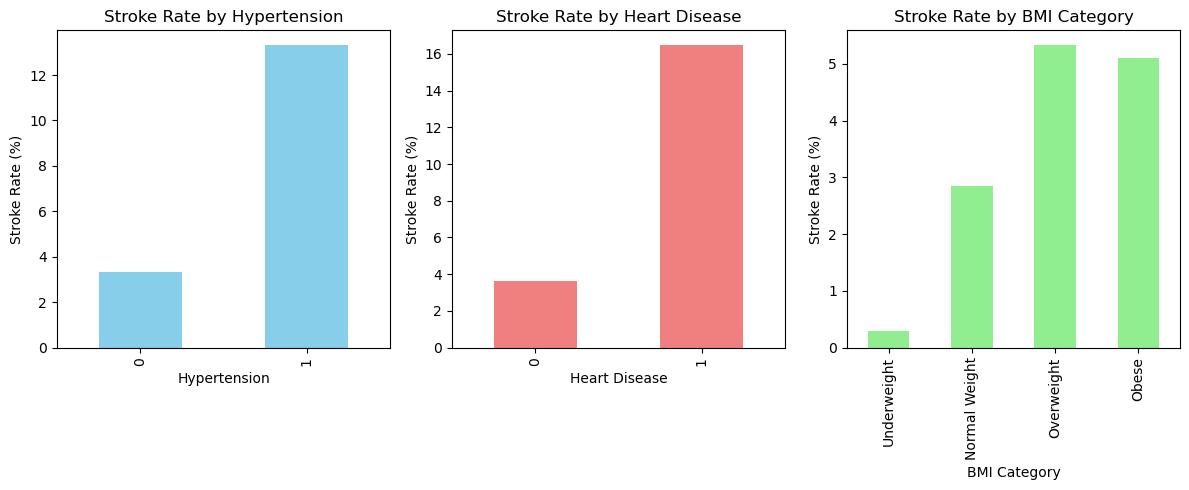

In [14]:


# Calculate stroke rate by hypertension
stroke_rate_hypertension = stroke_data_cleaned.groupby('hypertension')['stroke'].mean() * 100

# Calculate stroke rate by heart disease
stroke_rate_heart_disease = stroke_data_cleaned.groupby('heart_disease')['stroke'].mean() * 100

# Calculate stroke rate by BMI category (e.g., creating bins for BMI)

# Modify the bins and labels as needed
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
stroke_data_cleaned['bmi_category'] = pd.cut(stroke_data_cleaned['bmi'], bins=bins, labels=labels, include_lowest=True)
stroke_rate_bmi_category = stroke_data_cleaned.groupby('bmi_category')['stroke'].mean() * 100


# Visualize the relationships using bar plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
stroke_rate_hypertension.plot(kind='bar', color='skyblue')
plt.title('Stroke Rate by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Stroke Rate (%)')

plt.subplot(1, 3, 2)
stroke_rate_heart_disease.plot(kind='bar', color='lightcoral')
plt.title('Stroke Rate by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Stroke Rate (%)')

plt.subplot(1, 3, 3)
stroke_rate_bmi_category.plot(kind='bar', color='lightgreen')
plt.title('Stroke Rate by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Stroke Rate (%)')

plt.tight_layout()

#Save the visualization
plt.savefig('../Data Visualizations/1_stroke_rate_by_health_conditions.png') 



plt.show()



## Classifications based on different variables

##  Classification based on Age Group

In [15]:
#Classify using the group by for Age Group
age_group_df = stroke_data_cleaned[['age_group', 'stroke']]

#Creating a Count of Stroke Cases by Age Group in a DataFrame
aggregate_age_group_df = age_group_df.groupby(['age_group','stroke']).size().reset_index(name='count')

#Adding percentage column to the Dataframe
total_count = aggregate_age_group_df['count'].sum()

# Calculate percentages
aggregate_age_group_df['percentages'] = (aggregate_age_group_df['count'] / total_count) * 100


#Display the Data Frame
aggregate_age_group_df

,age_group,stroke,count,percentages
0,Adult,0,1164,23.716381
1,Adult,1,5,0.101874
2,Middle Age,0,1457,29.686227
3,Middle Age,1,53,1.079870
4,Senior,0,1135,23.125509
5,Senior,1,150,3.056235
6,Teenage,0,314,6.397718
7,Teenage,1,1,0.020375
8,Young,0,629,12.815811


In [16]:
#Counting the Number of Records in Each Age Group
each_group_count= age_group_df['age_group'].value_counts()
each_group_count

Middle Age    1510
Senior        1285
Adult         1169
Young          629
Teenage        315
Name: age_group, dtype: int64

##  Visualization based on Age Group

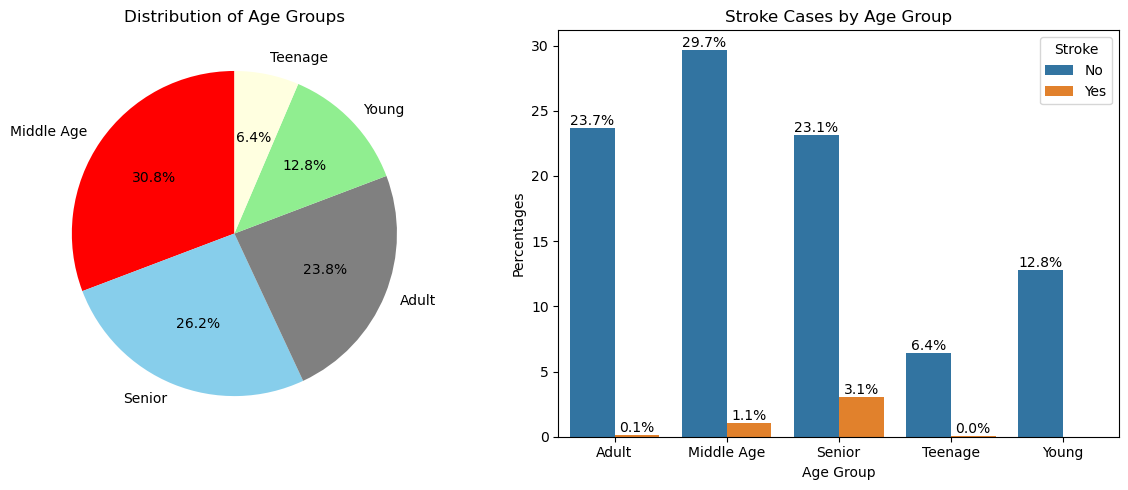

In [17]:
# Set up the figure
plt.figure(figsize=(12, 5))

# Plot the pie chart on the left
plt.subplot(1, 2, 1)
each_group_count.plot.pie(
    labels=each_group_count.index,
    colors=['red', 'skyblue', 'gray', 'lightgreen', 'lightyellow'],
    autopct='%1.1f%%',
    startangle=90,  # Adjust the starting angle of the pie chart
)

plt.ylabel('')  # Set the y-axis label for the pie chart
plt.title('Distribution of Age Groups')  # Add a title for the pie chart
#Display the Legend for Pie
#plt.legend(each_group_count.index, title='Age Groups', loc='upper left')

#
#
#

# Plot the bar chart on the right
plt.subplot(1, 2, 2)

# Calculate the percentages for the Age Groups
#Count the number of rows in each group
age_group_count = stroke_data_cleaned[['age_group', 'stroke']].value_counts()

# Calculate the percentages for the Age Groups
percentages = (age_group_count / age_group_count.sum()) * 100

# Create a bar plot using Seaborn
ax = sns.barplot(
    x='age_group',
    y='percentages',
    hue='stroke',
    data=aggregate_age_group_df,
    #palette={'0': 'gray', '1': 'green'},  # Set custom colors for the bars
)

# Customize the legend labels from '0' and '1' to 'No' and 'Yes'
handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Yes']  # Replace '0' and '1' with 'No' and 'Yes'
plt.legend(handles, labels, title='Stroke', loc='upper right')

#Labels the bar chart
plt.xlabel('Age Group')  # Set the x-axis label for the bar chart

plt.ylabel('Percentages')  # Set the y-axis label for the bar chart

plt.title('Stroke Cases by Age Group')  # Add a title for the bar chart

# Adding percentage labels to the bar chart
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
    )    
    
# Adjust spacing between subplots
plt.tight_layout()

#Save the visualization
plt.savefig('../Data Visualizations/2_visualization_based_on_age_group.png') 

 

# Show the combined plot
plt.show()

##  Classification Based on Gender 

In [18]:
#Classify using the group by for Gender
gender_df = stroke_data_cleaned[['gender', 'stroke']]

#Creating a Count of Stroke Cases by Gender in a DataFrame
aggregate_gender_df = gender_df.groupby(['gender','stroke']).size().reset_index(name='count')

#Adding percentage column to the Dataframe
total_count = aggregate_gender_df['count'].sum()

# Calculate percentages
aggregate_gender_df['percentages'] = (aggregate_gender_df['count'] / total_count) * 100

#Display the Data Frame
aggregate_gender_df

,gender,stroke,count,percentages
0,Female,0,2777,56.581092
1,Female,1,120,2.444988
2,Male,0,1922,39.160554
3,Male,1,89,1.813366


In [19]:
#Counting the Number of Records in Each Age Group
gender_count= stroke_data_cleaned['gender'].value_counts()
gender_count

Female    2897
Male      2011
Name: gender, dtype: int64

##  Visualization Based on Gender 

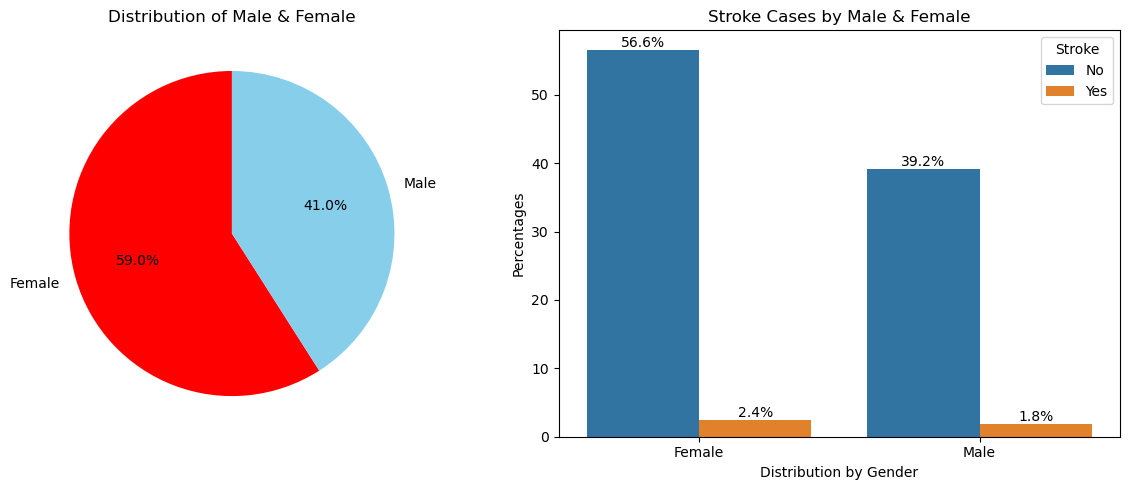

In [20]:
# Set up the figure
plt.figure(figsize=(12, 5))

# Plot the pie chart on the left
plt.subplot(1, 2, 1)
gender_count.plot.pie(
    labels=gender_count.index,
    colors=['red', 'skyblue', 'gray', 'lightgreen'],
    autopct='%1.1f%%',
    startangle=90,  # Adjust the starting angle of the pie chart
)
plt.ylabel('')  # Set the y-axis label for the pie chart
plt.title('Distribution of Male & Female')  # Add a title for the pie chart

#
#
#

# Plot the bar chart on the right
plt.subplot(1, 2, 2)

# Calculate the percentages for the Gender
#Count the number of rows in each Gender
gender_count = stroke_data_cleaned[['gender', 'stroke']].value_counts()

# Calculate the percentages for the Gender
percentages = (gender_count / gender_count.sum()) * 100

# Create a bar plot using Seaborn
ax = sns.barplot(
    x='gender',
    y='percentages',
    hue='stroke',
    data=aggregate_gender_df,
    #palette={'0': 'gray', '1': 'green'},  # Set custom colors for the bars
)

# Customize the legend labels from '0' and '1' to 'No' and 'Yes'
handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Yes']  # Replace '0' and '1' with 'No' and 'Yes'
plt.legend(handles, labels, title='Stroke', loc='upper right')

#Labels the bar chart
plt.xlabel('Distribution by Gender')  # Set the x-axis label for the bar chart

plt.ylabel('Percentages')  # Set the y-axis label for the bar chart

plt.title('Stroke Cases by Male & Female')  # Add a title for the bar chart

# Adding percentage labels to the bar chart
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
    )    
    
# Adjust spacing between subplots
plt.tight_layout()

#Save the visualization
plt.savefig('../Data Visualizations/3_visualization_based_on_gender.png')

# Show the combined plot
plt.show()

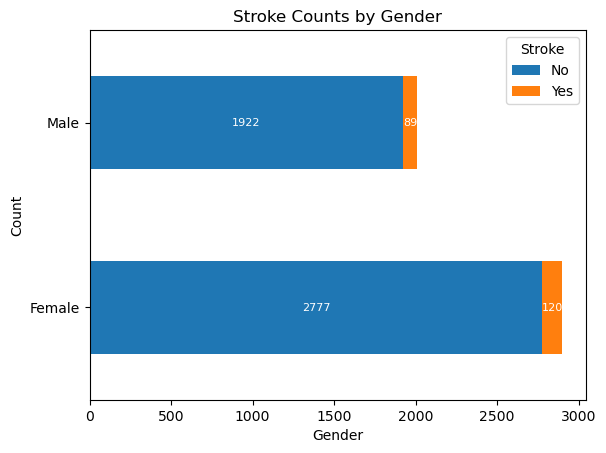

In [21]:
# Pivot the data for stacked chart by Gender
df_pivot = aggregate_gender_df.pivot(index='gender', columns='stroke', values='count')

# Plot the stacked column chart
ax = df_pivot.plot(kind='barh', stacked=True)

# Add title and labels
plt.title('Stroke Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Customize the legend labels from '0' and '1' to 'No' and 'Yes'
handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Yes']  # Replace '0' and '1' with 'No' and 'Yes'
plt.legend(handles, labels, title='Stroke', loc='upper right')

# Add percentages as text on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=8, color='white')


#Save the visualization
plt.savefig('../Data Visualizations/4_visualization_based_on_gender_stacked_column.png')

# Show the chart
plt.show()

##  Classification Based on Marital Status

In [22]:
#Classify using the group by for Marital Status
ever_married_df = stroke_data_cleaned[['ever_married', 'stroke']]

#Creating a Count of Stroke Cases by Marital Status in a DataFrame
aggregate_ever_married_df = ever_married_df.groupby(['ever_married','stroke']).size().reset_index(name='count')

#Adding percentage column to the Dataframe
total_count = aggregate_ever_married_df['count'].sum()

# Calculate percentages
aggregate_ever_married_df['percentages'] = (aggregate_ever_married_df['count'] / total_count) * 100

#Display the Data Frame
aggregate_ever_married_df

,ever_married,stroke,count,percentages
0,No,0,1681,34.250204
1,No,1,23,0.468623
2,Yes,0,3018,61.491443
3,Yes,1,186,3.789731


In [23]:
#Counting the Number of Records for Marital Status
ever_married_count= stroke_data_cleaned['ever_married'].value_counts()
ever_married_count

Yes    3204
No     1704
Name: ever_married, dtype: int64

##  Visualization Based on Marital Status

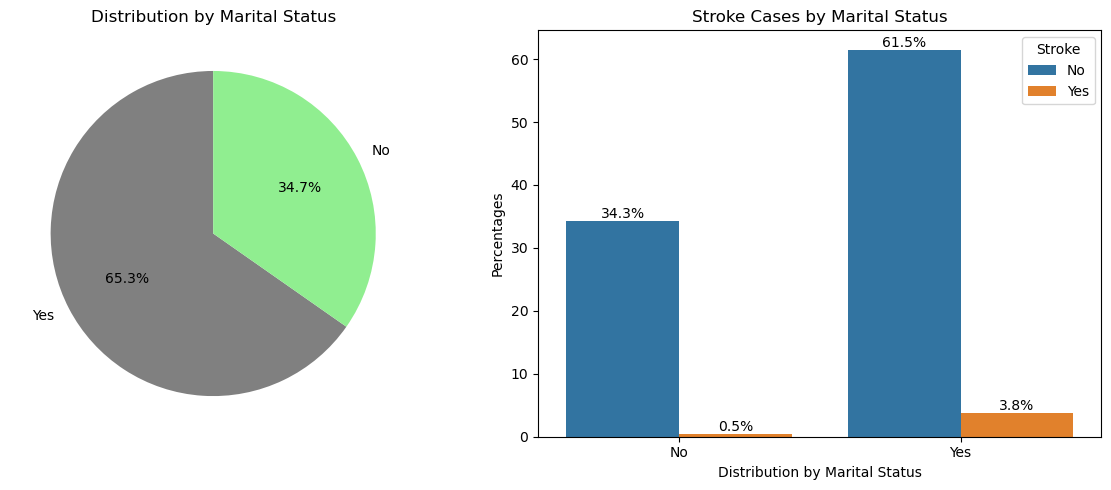

In [24]:
# Set up the figure
plt.figure(figsize=(12, 5))

# Plot the pie chart on the left
plt.subplot(1, 2, 1)
ever_married_count.plot.pie(
    labels=ever_married_count.index,
    colors=[  'gray', 'lightgreen'],
    autopct='%1.1f%%',
    startangle=90,  # Adjust the starting angle of the pie chart
)

plt.ylabel('')  # Set the y-axis label for the pie chart
plt.title('Distribution by Marital Status')  # Add a title for the pie chart


#
#
#

# Plot the bar chart on the right
plt.subplot(1, 2, 2)

# Calculate the percentages for the Marital Status
#Count the number of rows for the Marital Status
ever_married_count = stroke_data_cleaned[['ever_married', 'stroke']].value_counts()

# Calculate the percentages for the Marital Status
percentages = (ever_married_count / ever_married_count.sum()) * 100

# Create a bar plot using Seaborn
ax = sns.barplot(
    x='ever_married',
    y='percentages',
    hue='stroke',
    data=aggregate_ever_married_df,
    #palette={'0': 'gray', '1': 'green'},  # Set custom colors for the bars
)


# Customize the legend labels from '0' and '1' to 'No' and 'Yes'
handles, labels = ax.get_legend_handles_labels()

labels = ['No', 'Yes']  # Replace '0' and '1' with 'No' and 'Yes'

plt.legend(handles, labels, title='Stroke', loc='upper right')




#Labels the bar chart
plt.xlabel('Distribution by Marital Status')  # Set the x-axis label for the bar chart

plt.ylabel('Percentages')  # Set the y-axis label for the bar chart

plt.title('Stroke Cases by Marital Status')  # Add a title for the bar chart



# Adding percentage labels to the bar chart
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
    )    
    
# Adjust spacing between subplots
plt.tight_layout()

#Save the visualization
plt.savefig('../Data Visualizations/5_visualization_based_on_marital_status.png')

# Show the combined plot
plt.show()

## Classification Based on Work Type

In [25]:
#Classify using the group by for Work Type
work_type_df = stroke_data_cleaned[['work_type', 'stroke']]

#Creating a Count of Stroke Cases by Work Type in a DataFrame
aggregate_work_type_df = work_type_df.groupby(['work_type','stroke']).size().reset_index(name='count')

#Adding percentage column to the Dataframe
total_count = aggregate_work_type_df['count'].sum()

# Calculate percentages
aggregate_work_type_df['percentages'] = (aggregate_work_type_df['count'] / total_count) * 100


#Display the Data Frame
aggregate_work_type_df

,work_type,stroke,count,percentages
0,Govt_job,0,602,12.265689
1,Govt_job,1,28,0.570497
2,Never_worked,0,22,0.448248
3,Private,0,2683,54.665852
4,Private,1,127,2.587612
5,Self-employed,0,722,14.710676
6,Self-employed,1,53,1.079870
7,children,0,670,13.651182
8,children,1,1,0.020375


In [26]:
#Counting the Number of Records in Each Work Type
work_type_count= work_type_df['work_type'].value_counts()
work_type_count

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

## Visualization Based on Work Type

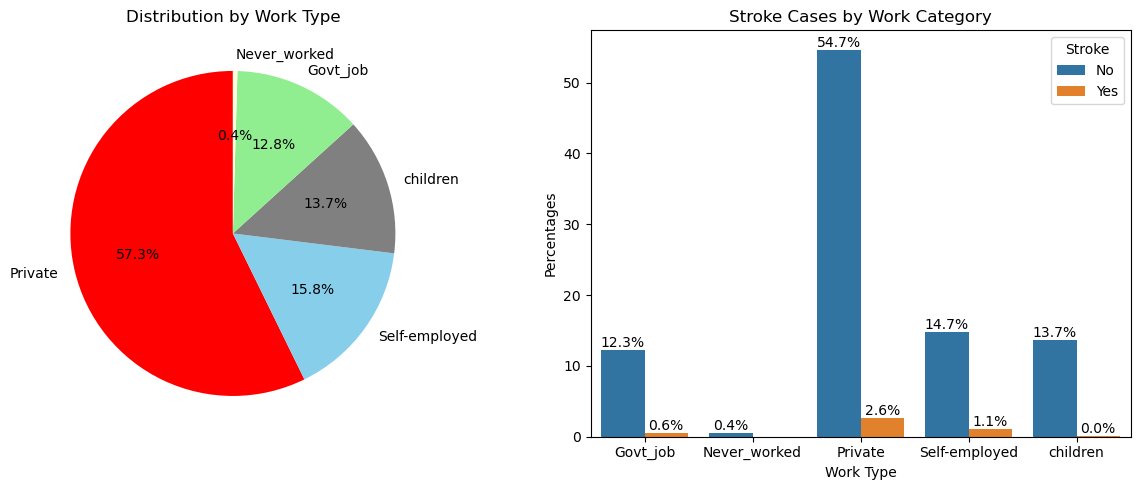

In [27]:
# Set up the figure
plt.figure(figsize=(12, 5))
# Plot the pie chart on the left
plt.subplot(1, 2, 1)
work_type_count.plot.pie(
    labels=work_type_count.index,
    colors=['red', 'skyblue', 'gray', 'lightgreen', 'lightyellow'],
    autopct='%1.1f%%',
    startangle=90,  # Adjust the starting angle of the pie chart
)
plt.ylabel('')  # Set the y-axis label for the pie chart
plt.title('Distribution by Work Type')  # Add a title for the pie chart

#
#
#

# Plot the bar chart on the right
plt.subplot(1, 2, 2)

# Calculate the percentages for the Wrok Type
#Count the number of rows for each Wrok Type
work_type_count = stroke_data_cleaned[['work_type', 'stroke']].value_counts()

# Calculate the percentages for the Wrok Type
percentages = (work_type_count / work_type_count.sum()) * 100

# Create a bar plot using Seaborn
ax = sns.barplot(
    x='work_type',
    y='percentages',
    hue='stroke',
    data=aggregate_work_type_df,
    #palette={'0': 'gray', '1': 'green'},  # Set custom colors for the bars
)


# Customize the legend labels from '0' and '1' to 'No' and 'Yes'
handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Yes']  # Replace '0' and '1' with 'No' and 'Yes'
plt.legend(handles, labels, title='Stroke', loc='upper right')


#Labels the bar chart
plt.xlabel('Work Type')  # Set the x-axis label for the bar chart

plt.ylabel('Percentages')  # Set the y-axis label for the bar chart

plt.title('Stroke Cases by Work Category')  # Add a title for the bar chart

# Adding percentage labels to the bar chart
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
    )    
    
# Adjust spacing between subplots
plt.tight_layout()

#Save the visualization
plt.savefig('../Data Visualizations/6_visualization_based_on_work_type.png')

# Show the combined plot
plt.show()

## Classification Based on Residence Type

In [28]:
#Classify using the group by Residence Type
Residence_type_df = stroke_data_cleaned[['Residence_type', 'stroke']]

#Creating a Count of Stroke Cases by Residence_Type in a DataFrame
aggregate_Residence_type_df = Residence_type_df.groupby(['Residence_type','stroke']).size().reset_index(name='count')

#Adding percentage column to the Dataframe
total_count = aggregate_Residence_type_df['count'].sum()

# Calculate percentages
aggregate_Residence_type_df['percentages'] = (aggregate_Residence_type_df['count'] / total_count) * 100

#Display the Data Frame
aggregate_Residence_type_df

,Residence_type,stroke,count,percentages
0,Rural,0,2318,47.229014
1,Rural,1,100,2.037490
2,Urban,0,2381,48.512632
3,Urban,1,109,2.220864


In [29]:
#Counting the Number of Records for Residence Type
Residence_type_count= stroke_data_cleaned['Residence_type'].value_counts()
Residence_type_count

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

## Visualization Based on Residence Type

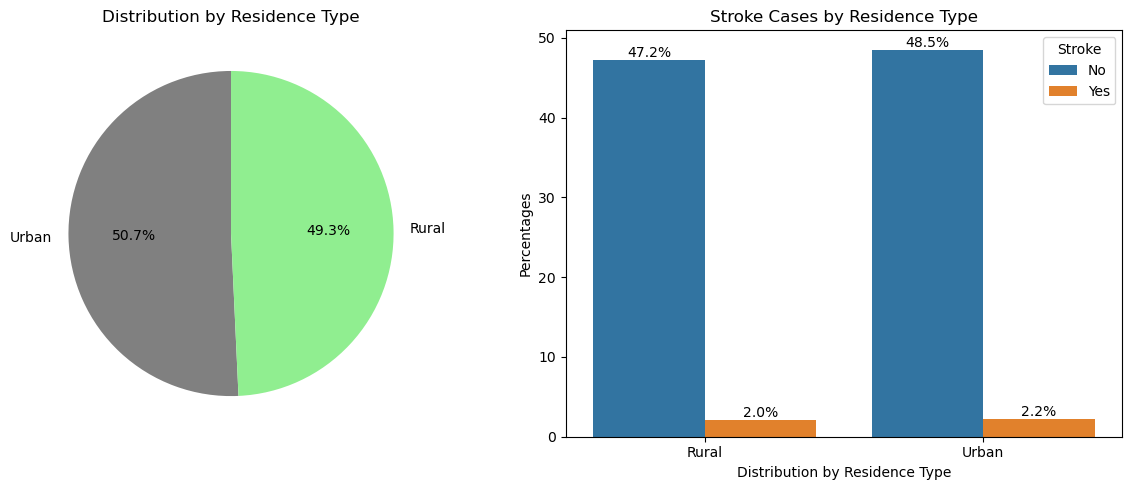

In [30]:
# Set up the figure
plt.figure(figsize=(12, 5))

# Plot the pie chart on the left
plt.subplot(1, 2, 1)
Residence_type_count.plot.pie(
    labels=Residence_type_count.index,
    colors=[  'gray', 'lightgreen'],
    autopct='%1.1f%%',
    startangle=90,  # Adjust the starting angle of the pie chart
)

plt.ylabel('')  # Set the y-axis label for the pie chart
plt.title('Distribution by Residence Type')  # Add a title for the pie chart


#
#
#

# Plot the bar chart on the right
plt.subplot(1, 2, 2)

# Calculate the percentages for the Residence Type
#Count the number of rows for the Residence Type
ever_married_count = stroke_data_cleaned[['Residence_type', 'stroke']].value_counts()

# Calculate the percentages for the Residence Type
percentages = (ever_married_count / ever_married_count.sum()) * 100

# Create a bar plot using Seaborn
ax = sns.barplot(
    x='Residence_type',
    y='percentages',
    hue='stroke',
    data=aggregate_Residence_type_df,
    #palette={'0': 'gray', '1': 'green'},  # Set custom colors for the bars
)


# Customize the legend labels from '0' and '1' to 'No' and 'Yes'
handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Yes']  # Replace '0' and '1' with 'No' and 'Yes'
plt.legend(handles, labels, title='Stroke', loc='upper right')


#Labels the bar chart
plt.xlabel('Distribution by Residence Type')  # Set the x-axis label for the bar chart

plt.ylabel('Percentages')  # Set the y-axis label for the bar chart

plt.title('Stroke Cases by Residence Type')  # Add a title for the bar chart

# Adding percentage labels to the bar chart
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
    )    
    
# Adjust spacing between subplots
plt.tight_layout()

#Save the visualization
plt.savefig('../Data Visualizations/7_visualization_based_on_residence_type.png')

# Show the combined plot
plt.show()

## Classification Based on Smoking Status

In [31]:
#Classify using the group by Smoking Status
smoking_status_df = stroke_data_cleaned[['smoking_status', 'stroke']]

# Filter the DataFrame to exclude rows with 'unknown' in the 'smoking_status' column
smoking_status_df = smoking_status_df[smoking_status_df['smoking_status'] != 'Unknown']

# Creating a Count of Stroke Cases by Smoking Status in a DataFrame
aggregate_smoking_status_df= smoking_status_df.groupby(['smoking_status','stroke']).size().reset_index(name='count')

# Adding percentage column to the Dataframe
total_count = aggregate_smoking_status_df['count'].sum()

# Calculate percentages
aggregate_smoking_status_df['percentages'] = (aggregate_smoking_status_df['count'] / total_count) * 100

#Display the Data Frame
aggregate_smoking_status_df

,smoking_status,stroke,count,percentages
0,formerly smoked,0,779,22.744526
1,formerly smoked,1,57,1.664234
2,never smoked,0,1768,51.620438
3,never smoked,1,84,2.452555
4,smokes,0,698,20.379562
5,smokes,1,39,1.138686


In [32]:
#Counting the Number of Records for Smoking Status
smoking_status_count= smoking_status_df['smoking_status'].value_counts()
smoking_status_count

never smoked       1852
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

## Visualization Based on Smoking Status

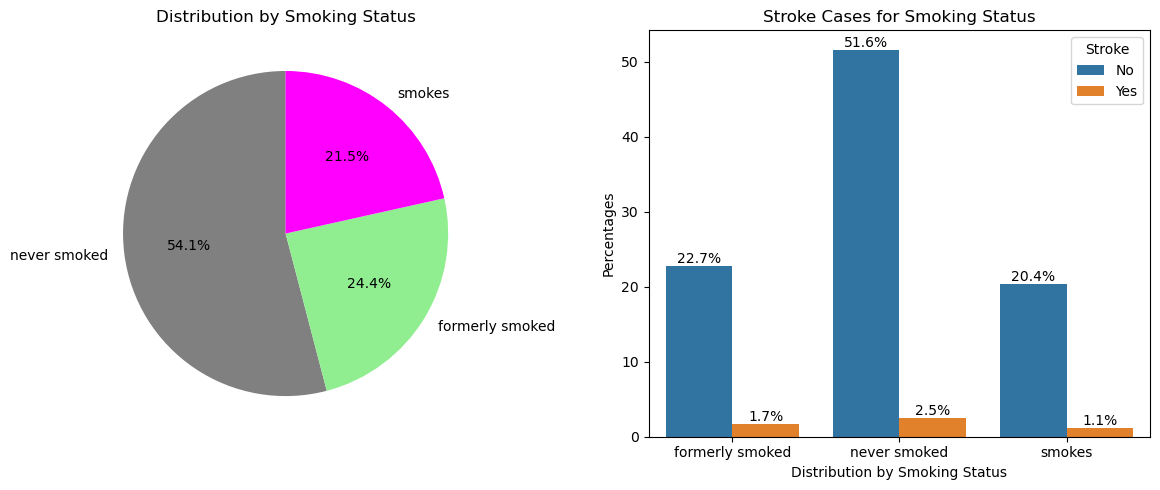

In [33]:
# Set up the figure
plt.figure(figsize=(12, 5))

# Plot the pie chart on the left
plt.subplot(1, 2, 1)
smoking_status_count.plot.pie(
    labels=smoking_status_count.index,
    colors=[  'gray', 'lightgreen', 'magenta'],
    autopct='%1.1f%%',
    startangle=90,  # Adjust the starting angle of the pie chart
)

plt.ylabel('')  # Set the y-axis label for the pie chart
plt.title('Distribution by Smoking Status')  # Add a title for the pie chart


#
#
#

# Plot the bar chart on the right
plt.subplot(1, 2, 2)

# Calculate the percentages for the Status
#Count the number of rows for the Smoking Status
smoking_status_count = stroke_data_cleaned[['Residence_type', 'stroke']].value_counts()

# Calculate the percentages for the Residence Type
percentages = (smoking_status_count / smoking_status_count.sum()) * 100

# Create a bar plot using Seaborn
ax = sns.barplot(
    x='smoking_status',
    y='percentages',
    hue='stroke',
    data=aggregate_smoking_status_df,
    #palette={'0': 'gray', '1': 'green'},  # Set custom colors for the bars
)


# Customize the legend labels from '0' and '1' to 'No' and 'Yes'
handles, labels = ax.get_legend_handles_labels()
labels = ['No', 'Yes']  # Replace '0' and '1' with 'No' and 'Yes'
plt.legend(handles, labels, title='Stroke', loc='upper right')


#Labels the bar chart
plt.xlabel('Distribution by Smoking Status')  # Set the x-axis label for the bar chart

plt.ylabel('Percentages')  # Set the y-axis label for the bar chart

plt.title('Stroke Cases for Smoking Status')  # Add a title for the bar chart

# Adding percentage labels to the bar chart
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1f}%',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
    )    
    
# Adjust spacing between subplots
plt.tight_layout()

#Save the visualization
plt.savefig('../Data Visualizations/8_visualization_based_on_smoking_status.png')

# Show the combined plot
plt.show()

## Classification Based on Hypertension and Heart Disease

In [34]:
#Classify using the group by for Hypertension
hypertension_df = stroke_data_cleaned[['hypertension', 'stroke']]

#Creating a Count of Stroke Cases by Hypertension in a DataFrame
aggregate_hypertension_df = hypertension_df.groupby(['hypertension','stroke']).size().reset_index(name='count')

# Calculate percentages
hypertension_total_count = aggregate_hypertension_df['count'].sum()
aggregate_hypertension_df['Percentage'] = (aggregate_hypertension_df['count'] / hypertension_total_count) * 100

#Display the Data Frame
aggregate_hypertension_df



,hypertension,stroke,count,Percentage
0,0,0,4308,87.775061
1,0,1,149,3.035860
2,1,0,391,7.966585
3,1,1,60,1.222494


In [35]:
#Classify using the group by for Heart Disease
heart_disease_df = stroke_data_cleaned[['heart_disease', 'stroke']]

#Creating a Count of Stroke Cases by Heart Disease in a DataFrame
aggregate_heart_disease_df = heart_disease_df.groupby(['heart_disease','stroke']).size().reset_index(name='count')

# Calculate percentages
heart_disease_total_count = aggregate_heart_disease_df['count'].sum()
aggregate_heart_disease_df['Percentage'] = (aggregate_heart_disease_df['count'] / heart_disease_total_count) * 100

#Display the Data Frame
aggregate_heart_disease_df



,heart_disease,stroke,count,Percentage
0,0,0,4496,91.605542
1,0,1,169,3.443358
2,1,0,203,4.136104
3,1,1,40,0.814996


## Visulaization Based on Hypertension and Heart Disease

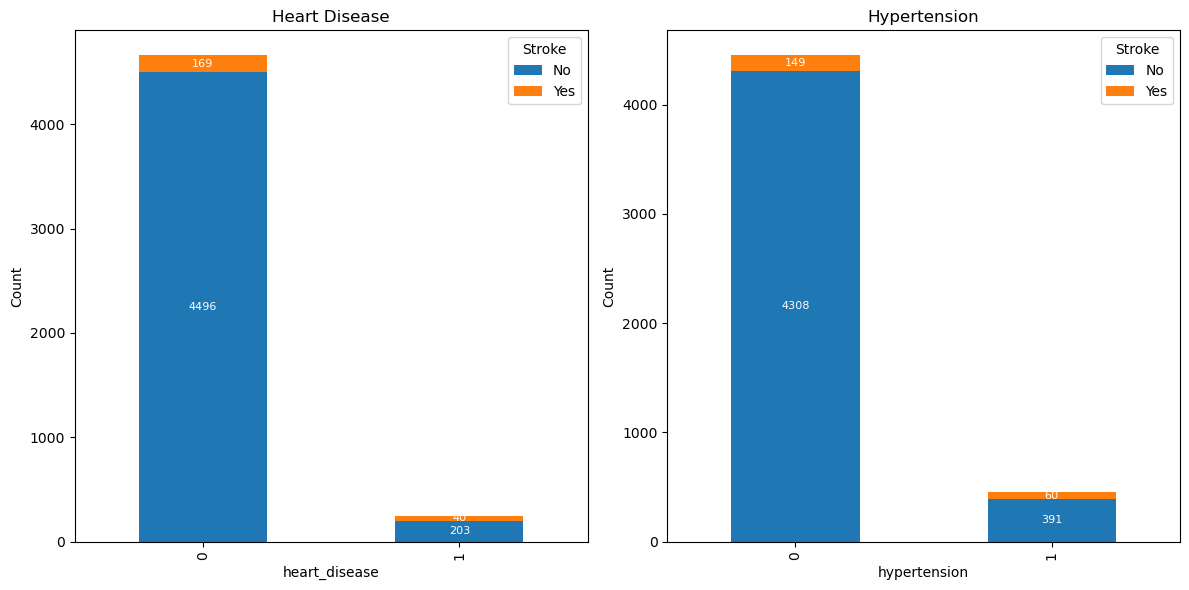

In [36]:
df1 = pd.DataFrame(aggregate_heart_disease_df)
df2 = pd.DataFrame(aggregate_hypertension_df)


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Function to plot each dataframe
def plot_dataframe(ax, df1, title):
    df_pivot = df1.pivot(index=df1.columns[0], columns=df1.columns[1], values='count')
    df_pivot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(df1.columns[0])
    ax.set_ylabel('Count')
       

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='center', fontsize=8, color='white')

# Plot first dataframe
plot_dataframe(axs[0], df1, 'Heart Disease')
# Plot second dataframe
plot_dataframe(axs[1], df2, 'Hypertension')


# Customize the legend labels
legend_labels = ['No', 'Yes']
for ax in axs:
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, legend_labels, title='Stroke', loc='upper right')
    
    
# Adjust layout
plt.tight_layout()

#Save the visualization
plt.savefig('../Data Visualizations/9_visualization_based_on_hypertension_and_heartdisease.png')

# Show the plots
plt.show()

# Scatter Plots and Linear Regression for Different Variables

## Separate Data Frames for Stroke Status Yes & NO

In [37]:
# seprate the data frame with stoke and without stroke
stroke_yes_df = stroke_data_cleaned[(stroke_data_cleaned['stroke']==1)]
stroke_no_df = stroke_data_cleaned[(stroke_data_cleaned['stroke']==0)]


## Overall Scatter Plots __ BMI  vs.   Avg Glucose Level 

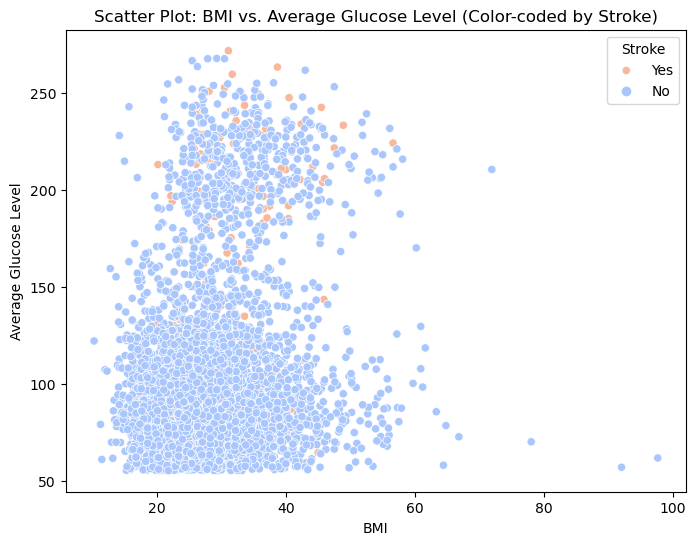

                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     156.2
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.60e-35
Time:                        20:18:12   Log-Likelihood:                -25507.
No. Observations:                4908   AIC:                         5.102e+04
Df Residuals:                    4906   BIC:                         5.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.5868      2.380     32.174      0.0

In [38]:
# Assuming df is your DataFrame with 'bmi' and 'avg_glucose_level' columns
stroke_data_cleaned = stroke_data_cleaned.dropna(subset=['bmi', 'avg_glucose_level'])  # Drop rows with missing values

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='avg_glucose_level', data=stroke_data_cleaned, hue='stroke', palette='coolwarm')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Scatter Plot: BMI vs. Average Glucose Level (Color-coded by Stroke)')
plt.legend(title='Stroke', labels=['Yes', 'No'])
#plt.show()

# Perform linear regression
X = stroke_data_cleaned['bmi']
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = stroke_data_cleaned['avg_glucose_level']

model = sm.OLS(y, X).fit()

#Save the visualization
plt.savefig('../Data Visualizations/10_visualization_overall_stroke_scatter_plot_bmi_vs_glucose.png')

plt.show()


summary = model.summary()
print(summary)

##  Scatter Plots Stroke Status _ YES _____  BMI  vs.   Avg Glucose Level 

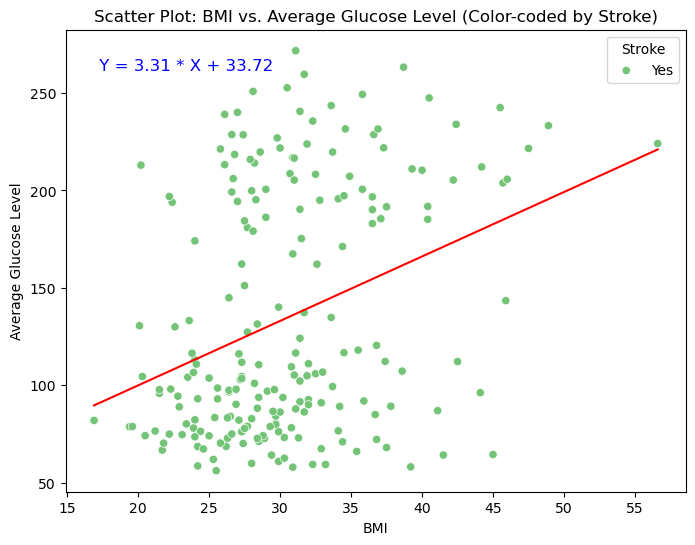

                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     26.23
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           6.91e-07
Time:                        20:18:12   Log-Likelihood:                -1147.7
No. Observations:                 209   AIC:                             2299.
Df Residuals:                     207   BIC:                             2306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.7241     20.108      1.677      0.0

In [39]:
# Assuming df is your DataFrame with 'bmi' and 'avg_glucose_level' columns
stroke_yes_df = stroke_yes_df.dropna(subset=['bmi', 'avg_glucose_level'])  # Drop rows with missing values

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='avg_glucose_level', data=stroke_yes_df, hue='stroke', palette='Greens')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Scatter Plot: BMI vs. Average Glucose Level (Color-coded by Stroke)')
plt.legend(title='Stroke', labels=['Yes'])
#plt.show()

# Perform linear regression
X = stroke_yes_df['bmi']
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = stroke_yes_df['avg_glucose_level']

model = sm.OLS(y, X).fit()

# Plot the regression line
X_plot = np.linspace(min(X['bmi']), max(X['bmi']), 100)  # Generate X values for the regression line
Y_plot = model.predict(sm.add_constant(X_plot))  # Predict Y values using the model

plt.plot(X_plot, Y_plot, color='red', label='Regression Line')

# Add the regression equation to the plot
equation_text = f' Y = {model.params[1]:.2f} * X + {model.params[0]:.2f} '
plt.annotate(equation_text, xy=(min(X['bmi']), max(y) - 10), fontsize=12, color='blue')


#Save the visualization
plt.savefig('../Data Visualizations/11_visualization_YES_stroke_regression_bmi_vs_glucose.png')

#display the plot
plt.show()


summary = model.summary()
print(summary)





##  Scatter Plots Stroke Status _ NO _____  BMI  vs.   Avg Glucose Level 

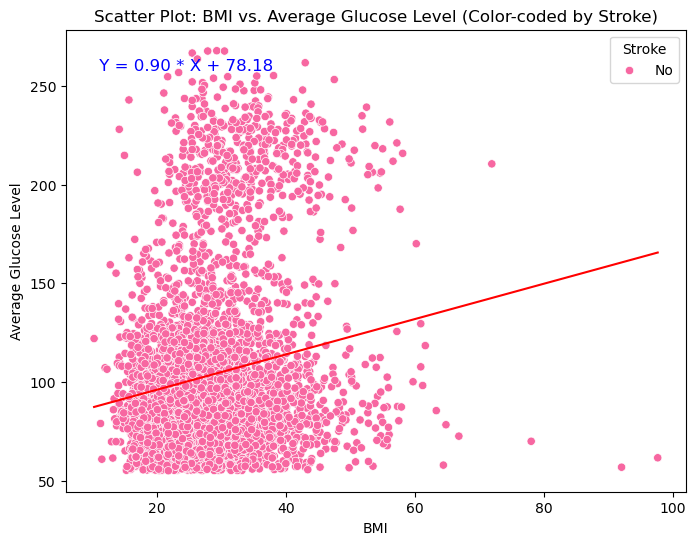

                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     131.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           6.23e-30
Time:                        20:18:13   Log-Likelihood:                -24276.
No. Observations:                4699   AIC:                         4.856e+04
Df Residuals:                    4697   BIC:                         4.857e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1831      2.339     33.429      0.0

In [40]:
# Assuming df is your DataFrame with 'bmi' and 'avg_glucose_level' columns
stroke_no_df = stroke_no_df.dropna(subset=['bmi', 'avg_glucose_level'])  # Drop rows with missing values

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='avg_glucose_level', data=stroke_no_df, hue='stroke', palette='RdPu')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Scatter Plot: BMI vs. Average Glucose Level (Color-coded by Stroke)')
plt.legend(title='Stroke', labels=['No'])
#plt.show()

# Perform linear regression
X = stroke_no_df['bmi']
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
y = stroke_no_df['avg_glucose_level']

model = sm.OLS(y, X).fit()

# Plot the regression line
X_plot = np.linspace(min(X['bmi']), max(X['bmi']), 100)  # Generate X values for the regression line
Y_plot = model.predict(sm.add_constant(X_plot))  # Predict Y values using the model

plt.plot(X_plot, Y_plot, color='red', label='Regression Line')

# Add the regression equation to the plot
equation_text = f' Y = {model.params[1]:.2f} * X + {model.params[0]:.2f} '
plt.annotate(equation_text, xy=(min(X['bmi']), max(y) - 10), fontsize=12, color='blue')

#Save the visualization
plt.savefig('../Data Visualizations/12_visualization_NO_stroke_regression_bmi_vs_glucose.png')

#display the plot
plt.show()


summary = model.summary()
print(summary)



